<a href="https://colab.research.google.com/github/JoshuaOmondi/COVID-19/blob/master/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries

We analyze some factors that affect the life expectancy of a person. We also develop a regression model to predict life expectancy of a person.

In [ ]:
pip install pycountry_convert

In [2]:
import warnings
import numpy as np
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

In [3]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.mode.chained_assignment = None 

In [4]:
life_expectancy_data = pd.read_csv("Life Expectancy Data.csv")
life_expectancy_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# Countries with the highest and lowest life expectancy
country_vs_life = life_expectancy_data.groupby('Country', as_index=False)['Life expectancy '].mean()
country_vs_life.sort_values(by = 'Life expectancy ', ascending=False).head(10)

,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [6]:
country_vs_life.sort_values(by = 'Life expectancy ', ascending = True).head(10)

,Country,Life expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375
32,Chad,50.38750
44,Côte d'Ivoire,50.38750
192,Zimbabwe,50.48750
164,Swaziland,51.32500
123,Nigeria,51.35625


**Plot to visualize life expectancy and the GDP**

In [7]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
continent = []
for country in life_expectancy_data['Country']:
    try:
        continent.append(continents[(country_alpha2_to_continent_code(country_name_to_country_alpha2(country)))])
    except:
        continent.append("Africa")
    
life_expectancy_data["Continent"] = continent
to_bubble = life_expectancy_data[["Country", "Year", "Life expectancy ", "GDP", "Population", "Continent"]]
to_bubble.dropna(inplace = True)

In [8]:
df = px.data.gapminder()

fig = px.scatter(to_bubble, x="GDP", y="Life expectancy ",
                 size="Population", color="Continent",
                 hover_name="Country", log_x=True, size_max=50)
fig.show()


**Findings**
*   Most African countries have low life expectancy
*   Countries with high GDP tend to have higher life expectancy
*   Most countries in Europe have a high GDP as well as life expectancy.
*   Life expectancy and GDP have a linear relationship.



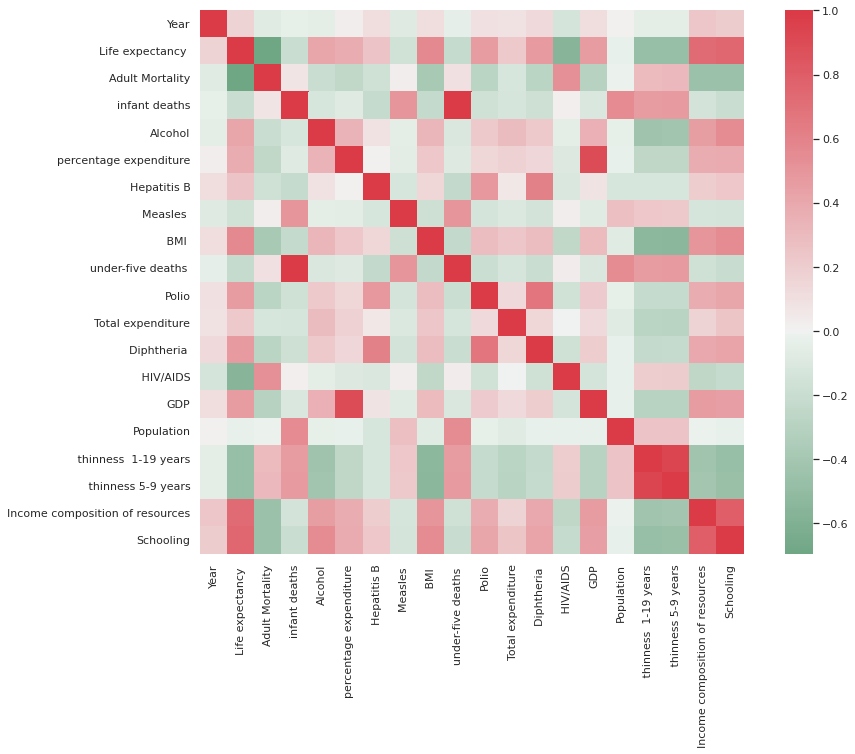

In [9]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(life_expectancy_data.corr(), cmap =cmap, center=0, annot=False, square=True);

From the heatmap above, it is evident that there is a negative correlation between life expectancy and diseases. The level of income and schooling are positively correlated with life expectancy. There is also a positive correlation between life expectancy and vaccination. This explains why those who are vaccinated against diseases like polio, Diphteria and Hepatitis B have a higher life expectancy.

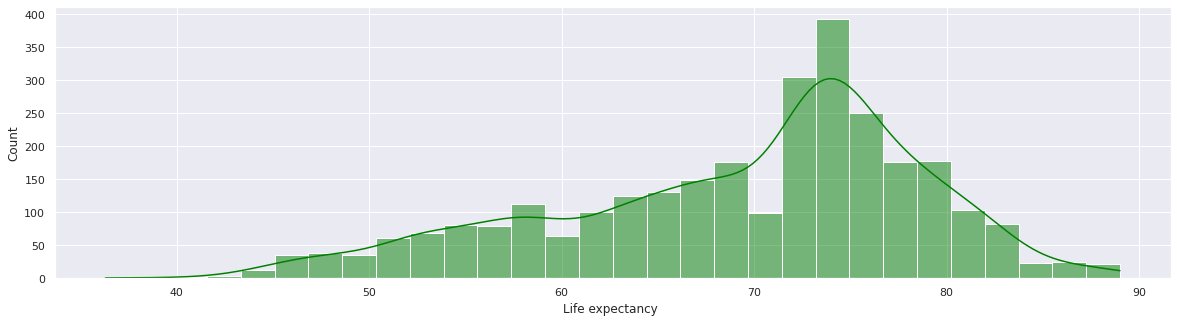

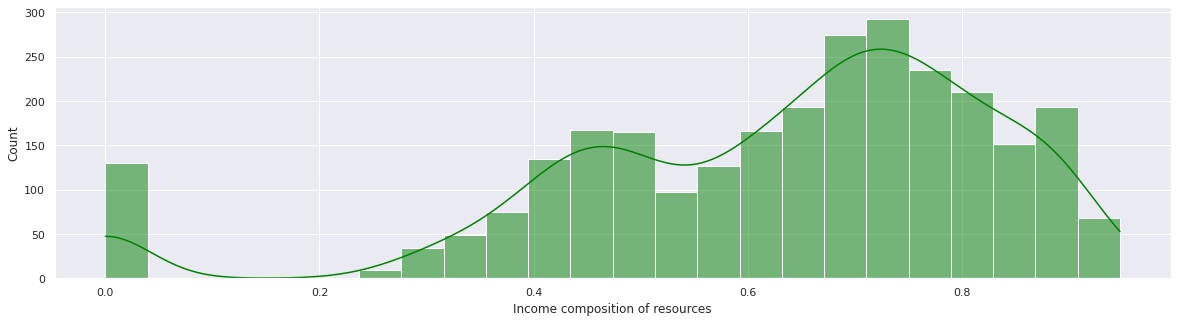

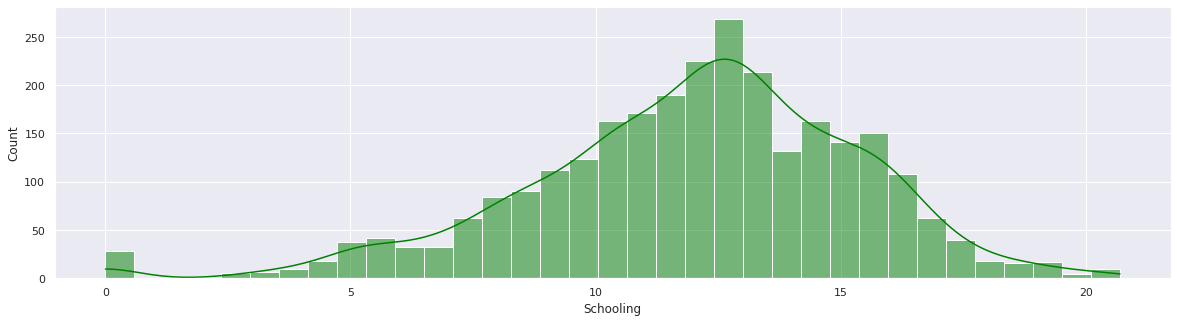

In [10]:
l= [life_expectancy_data['Life expectancy '].dropna(), life_expectancy_data['Income composition of resources'].dropna(), life_expectancy_data['Schooling'].dropna()]
for i in l:
    plt.figure(figsize=(20,5))
    sns.histplot(i, kde=True, color="green")

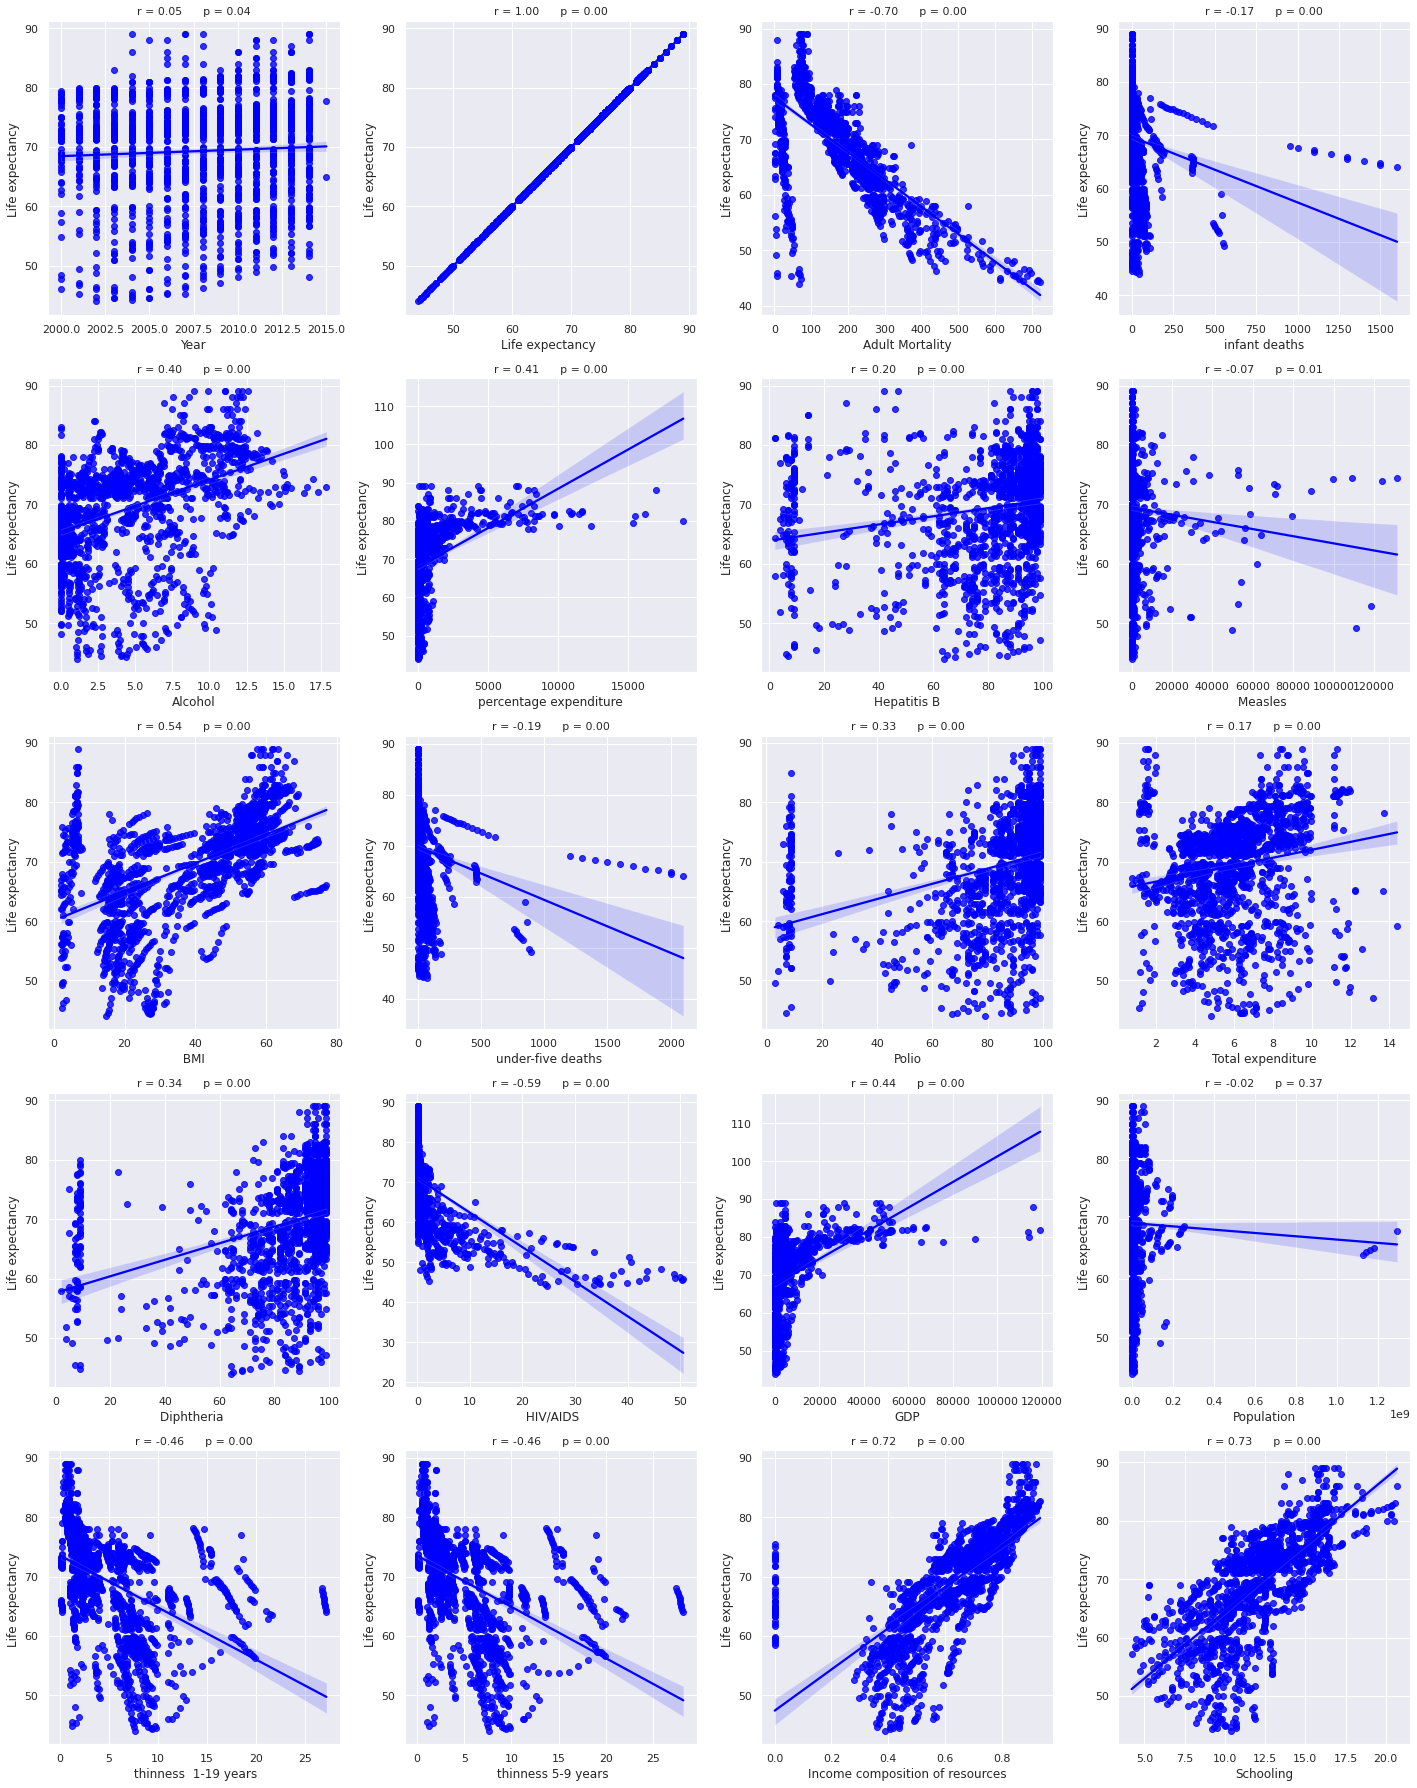

In [11]:
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*5))
numerical_feats = life_expectancy_data.dtypes[life_expectancy_data.dtypes != "object"].index
li_num_feats = list(numerical_feats)
li_not_plot = []
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]
life_expectancy_data.dropna(inplace = True)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(x = life_expectancy_data[li_plot_num_feats[i]],y = life_expectancy_data["Life expectancy "] , color = 'blue', ax = axs[r][c])
            stp = stats.pearsonr(life_expectancy_data[li_plot_num_feats[i]], life_expectancy_data["Life expectancy "])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
            
plt.tight_layout()    
sns.set(color_codes=True)
plt.show();

**Insights**


*   Life expectancy has been increasing over the years.
*   GDP and life expectancy have a linear relationship. 
*   Interesting that countries with high levels of alcohol consumption have a higher life expectancy.(Let's find out why next)
*   An increase in one's income leads to an increase in life expectancy.
*   Increasing infant mortality leads to a decrease in life expectancy.


**Impact of Alcohol Consumption on Life Expectancy (A comparison by Continents.)**

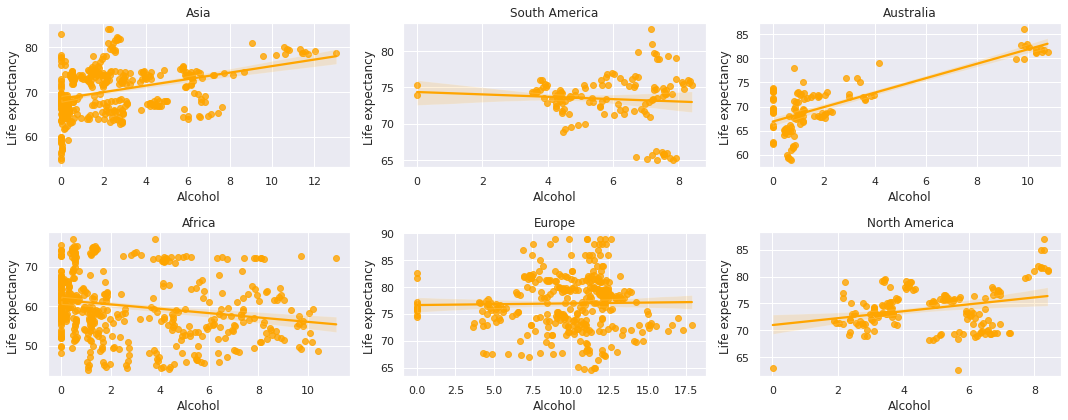

In [13]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5)

for conts, ax in zip(set(life_expectancy_data["Continent"]), axs.flat):
    Conts = life_expectancy_data[life_expectancy_data['Continent'] == conts]
    sns.regplot(x = Conts['Alcohol'],y = Conts["Life expectancy "], color = 'orange', ax = ax).set_title(conts)

plt.tight_layout()    
sns.set(color_codes=True)
plt.show()

In most continents, alcohol consumption and life expectancy have a positive correlation. With the exception of Africa.

**Regression Model For Estimating Life Expectancy**

The aim is to come up with a model that estimates life expectancy given the parameters present. We will use the Random Forest Regressor with Random and Grid Search CV. Random Search CV will be used to select the expected neighbourhood of the model parameters. Grid Search CV will be used for fine-tuning the parameters. Results will be compared with the baseline model. For model evaluation, we will use R Squared error and the Residual Distribution and finally draw a conclusion.

In [14]:
target = life_expectancy_data["Life expectancy "]
features = life_expectancy_data[life_expectancy_data.columns.difference(['Life expectancy '])]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(features), target, test_size=0.3)

In [16]:
#Random Search Cross-Validation Random Forest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [17]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [4, 25, 47, 69, 91, 112, 134, 156, 178, 200]}


In [18]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 7 fold cross validation, 
# search across 200 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [19]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25}

In [20]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor()   # n_estimators = 10
base_model.fit( X_test, Y_test)
base_accuracy = evaluate(base_model, X_test, Y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,  X_test, Y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.5819 degrees.
Accuracy = 99.11%.
Model Performance
Average Error: 1.3879 degrees.
Accuracy = 97.80%.
Improvement of -1.32%.


Huh? Looks like the baseline model is better than the tuned model. 

In [21]:
#Grid Search with Cross-Validation Random Forest

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 50, None],
    'max_features': [2, 3, 4, 'auto','sqrt'],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [1, 2, 4, 8],
    'n_estimators': [10, 30, 100, 120, 150]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, Y_train)

In [23]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, Y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Model Performance
Average Error: 1.3117 degrees.
Accuracy = 97.92%.
Improvement of -1.20%.


In [24]:
model_predictions = best_grid.predict(X_test)
residuals = model_predictions - Y_test

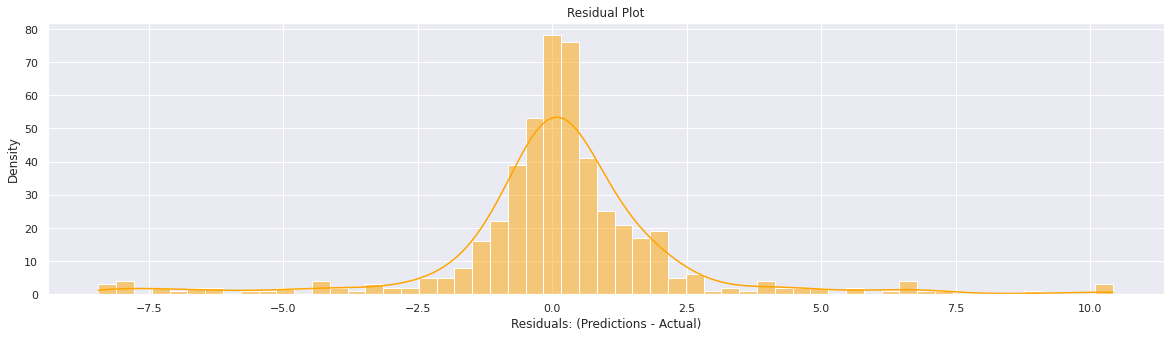

In [25]:
plt.figure(figsize=(20,5))
sns.histplot(residuals, kde=True, color="orange")
plt.title('Residual Plot')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel('Density');

In [26]:
#R Squared Score
from sklearn.metrics import r2_score
print("R-squared Score Obtained for predicting Life Expectancy is {0}".format(r2_score(Y_test, model_predictions)))

R-squared Score Obtained for predicting Life Expectancy is 0.9388331570033541


**Conclusion**

Lifespan can be extended by adopting a healthy lifestlye, embracing education and being vaccinated. 
Location is a key determinant of life expectancy. Countries from the Global North (developed countries) tend to have a higher life expectancy than countries from the Global South (developing countries.)